# **Implementing Linear regression**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **Dataset**

In [2]:
l1=[500,500,600,700,750,800,1000,1150,1280,1300]
l2=[10000,16000,13000,15000,14000,22000,20000,27000,29000,31000]

In [3]:
x=np.array(l1)
y=np.array(l2)

Text(0.5, 1.0, 'Scatter plot of dataset')

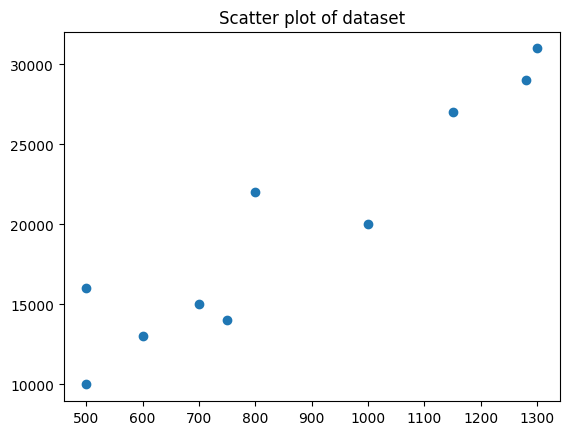

In [4]:
plt.scatter(x,y)
plt.title("Scatter plot of dataset")

#### **Making the Line of the regression function**

In [5]:
w=0.0
b=0.0
print("The value of slope=",w," and the value of y-intercept is=",b)

The value of slope= 0.0  and the value of y-intercept is= 0.0


#### **Making the Model**

In [6]:
def Model(x,w,b):
    m=x.shape[0]
    f_wb=np.zeros(m)
    for i in range (m):
        f_wb[i]=(w*x[i])+b
    return f_wb

#### **Cost Function**

In [7]:
def Cost(y,f_wb):
    m=y.shape[0]
    total_cost=0
    C=[]
    for i in range (m):
        diff=f_wb[i]-y[i]
        c=diff**2
        C.append(c)
        total_cost=total_cost+c
    total_cost=total_cost/(2*m)
    return total_cost,C

In [8]:
predict=Model(x,w,b)
print(predict)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
cost,C=Cost(y,predict)
print(C)
print(cost)

[100000000.0, 256000000.0, 169000000.0, 225000000.0, 196000000.0, 484000000.0, 400000000.0, 729000000.0, 841000000.0, 961000000.0]
218050000.0


Text(0.5, 1.0, '218050000.0')

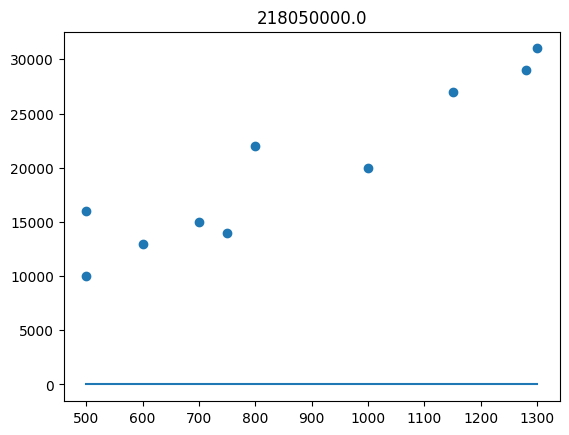

In [10]:
plt.scatter(x,y)
plt.plot(x,predict)
plt.title(cost)

#### **Making Gradient Descent**

In [11]:
def Gradient_Descent(x,y,predict,alpha,w,b):
    shift_w=0
    shift_b=0
    m=x.shape[0]
    for i in range (m):
        shift_w=shift_w+(predict[i]-y[i])*x[i]
        shift_b=shift_b+(predict[i]-y[i])
    shift_w=(shift_w*alpha)/m
    shift_b=(shift_b*alpha)/m
    w=w-shift_w
    b=b-shift_b
    return w,b

In [12]:
alpha=0.0000001
print("old w=",w,"old b=",b)
w,b=Gradient_Descent(x,y,predict,alpha,w,b)
print("new w=",w,"new b=",b)

old w= 0.0 old b= 0.0
new w= 1.8786999999999998 new b= 0.00197


In [13]:
predict=Model(x,w,b)
print(predict)

[ 939.35197  939.35197 1127.22197 1315.09197 1409.02697 1502.96197
 1878.70197 2160.50697 2404.73797 2442.31197]


In [14]:
print("old cost=",cost)
cost,C=Cost(y,predict)
print("new cost=",cost)

old cost= 218050000.0
new cost= 184202528.09672073


Text(0.5, 1.0, '184202528.09672073')

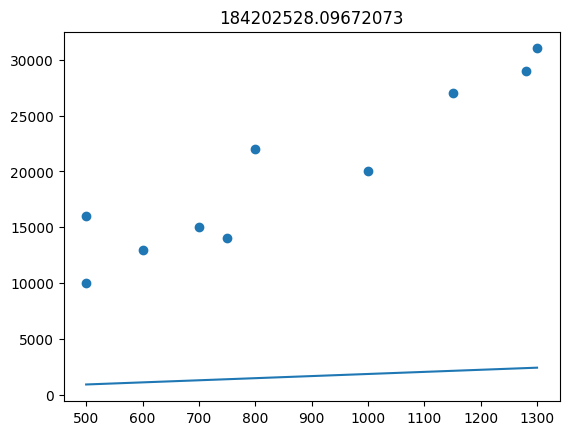

In [15]:
plt.scatter(x,y)
plt.plot(x,predict)
plt.title(cost)

In [16]:
i=0
while i<100:
    alpha=0.0000001
    print("old w=",w,"old b=",b)
    w,b=Gradient_Descent(x,y,predict,alpha,w,b)
    print("new w=",w,"new b=",b)
    i+=1

old w= 1.8786999999999998 old b= 0.00197
new w= 3.603282555174 new b= 0.0037788073430000003
old w= 3.603282555174 old b= 0.0037788073430000003
new w= 5.327865110348 new b= 0.005587614686
old w= 5.327865110348 old b= 0.005587614686
new w= 7.052447665522 new b= 0.007396422029
old w= 7.052447665522 old b= 0.007396422029
new w= 8.777030220696 new b= 0.009205229372
old w= 8.777030220696 old b= 0.009205229372
new w= 10.50161277587 new b= 0.011014036715000002
old w= 10.50161277587 old b= 0.011014036715000002
new w= 12.226195331044002 new b= 0.012822844058000002
old w= 12.226195331044002 old b= 0.012822844058000002
new w= 13.950777886218003 new b= 0.014631651401000003
old w= 13.950777886218003 old b= 0.014631651401000003
new w= 15.675360441392003 new b= 0.016440458744000002
old w= 15.675360441392003 old b= 0.016440458744000002
new w= 17.399942996566004 new b= 0.018249266087
old w= 17.399942996566004 old b= 0.018249266087
new w= 19.124525551740003 new b= 0.02005807343
old w= 19.124525551740003 

In [17]:
predict=Model(x,w,b)

Text(0.5, 1.0, '184202528.09672073')

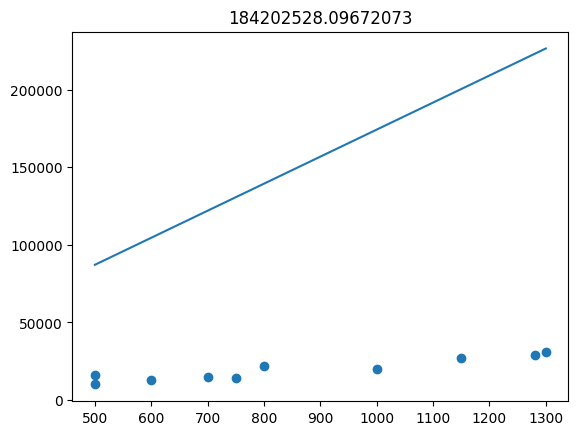

In [18]:
plt.scatter(x,y)
plt.plot(x,predict)
plt.title(cost)

### **We see that its not converging properly, that's why we'll normalize the data**

In [19]:
def min_max_normalisation(data):
    max=np.max(data)
    min=np.min(data)
    normalised=(data-min)/(max-min)
    return normalised

In [20]:
def unscale(normalised,max,min):
    data=(normalised*(max-min))+min
    return data

In [21]:
x_normalised=min_max_normalisation(x)
y_normalised=min_max_normalisation(y)
print(x_normalised)
print(y_normalised)

[0.     0.     0.125  0.25   0.3125 0.375  0.625  0.8125 0.975  1.    ]
[0.         0.28571429 0.14285714 0.23809524 0.19047619 0.57142857
 0.47619048 0.80952381 0.9047619  1.        ]


In [22]:
w=0
b=0

In [23]:
predict=Model(x_normalised,w,b)
print(predict)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### **Iterative method: In this method, we iterate gradient descet for a fixed number of times**

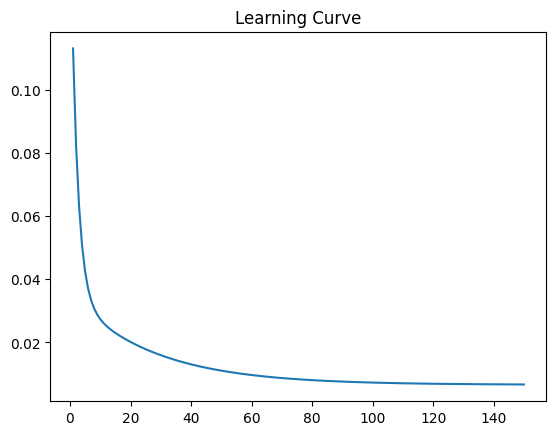

In [24]:
i=0
m=150
p=[]
alpha=0.17
while i<m:
    #print("old w=",w,"old b=",b)
    w,b=Gradient_Descent(x_normalised,y_normalised,predict,alpha,w,b)
    #print("new w=",w,"new b=",b)
    predict=Model(x_normalised,w,b)
    c,C=Cost(y_normalised,predict)
    p.append(c)
    i+=1
z=range(1,m+1)
plt.plot(z,p)
plt.title("Learning Curve")
plt.show()

In [25]:
print("w=",w,"b=",b)

w= 0.8119073502455609 b= 0.10077948535149242


In [26]:
cost,C=Cost(y_normalised,predict)
print(C)
print(cost)

[0.010156504667711676, 0.03420088038522621, 0.0035296385552803494, 0.004311378059429918, 0.026903984711793574, 0.02761706526538937, 0.017432212176426466, 0.002407825850036307, 0.00015308501484387877, 0.007623588678055995]
0.006716808168209685


In [27]:
print(predict)

[0.10077949 0.10077949 0.2022679  0.30375632 0.35450053 0.40524474
 0.60822158 0.76045421 0.89238915 0.91268684]


In [28]:
print(y_normalised)

[0.         0.28571429 0.14285714 0.23809524 0.19047619 0.57142857
 0.47619048 0.80952381 0.9047619  1.        ]


In [29]:
max_y=np.max(y)
min_y=np.min(y)
max_x=np.max(x)
min_x=np.min(x)

In [30]:
true_predict=unscale(predict,max_y,min_y)

In [31]:
print(true_predict)

[12116.36919238 12116.36919238 14247.62598678 16378.88278117
 17444.51117837 18510.13957557 22772.65316435 25969.53835595
 28740.17218866 29166.42354754]


In [32]:
print(y)

[10000 16000 13000 15000 14000 22000 20000 27000 29000 31000]


In [33]:
cost,C=Cost(y,true_predict)
print(cost)

2962112.4021804715


In [34]:
unscaled_w=unscale(w,max_x,min_x)
unscaled_b=unscale(b,max_y,min_y)
print("w=",unscaled_w)
print("b=",unscaled_b)

w= 1149.5258801964487
b= 12116.36919238134


Text(0.5, 1.0, '2962112.4021804715')

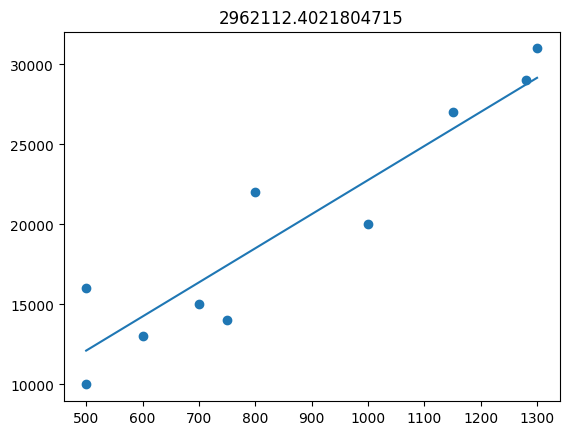

In [35]:
plt.scatter(x,y)
plt.plot(x,true_predict)
plt.title(cost)

### **Eplison method: In this method we keep doing gradient descent till convergence is reached**

In [36]:
w=0
b=0

191


Text(0.5, 1.0, 'Learning Curve')

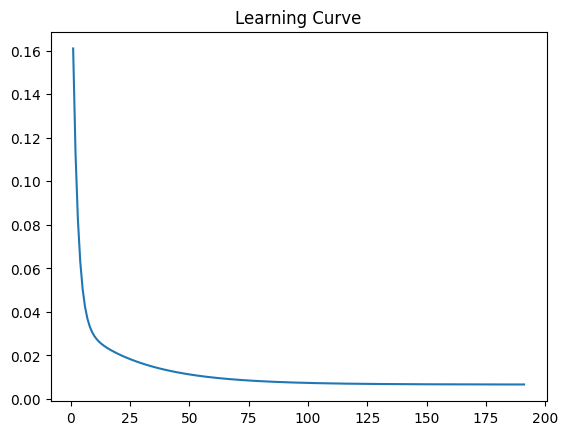

In [37]:
e=0.000001
p=[]
converged=False
old_cost=1
new_cost=0
i=0
while not converged:
    i+=1
    w,b=Gradient_Descent(x_normalised,y_normalised,predict,alpha,w,b)
    predict=Model(x_normalised,w,b)
    new_cost,C=Cost(y_normalised,predict)
    p.append(new_cost)
    if abs(new_cost-old_cost)<e:
        converged=True
    old_cost=new_cost
print(i)
z=range(1,i+1)
plt.plot(z,p)
plt.title("Learning Curve")

In [38]:
max_y=np.max(y)
min_y=np.min(y)
max_x=np.max(x)
min_x=np.min(x)

In [39]:
true_predict=unscale(predict,max_y,min_y)

In [40]:
unscaled_w=unscale(w,max_x,min_x)
unscaled_b=unscale(b,max_y,min_y)

Text(0.5, 1.0, '2962112.4021804715')

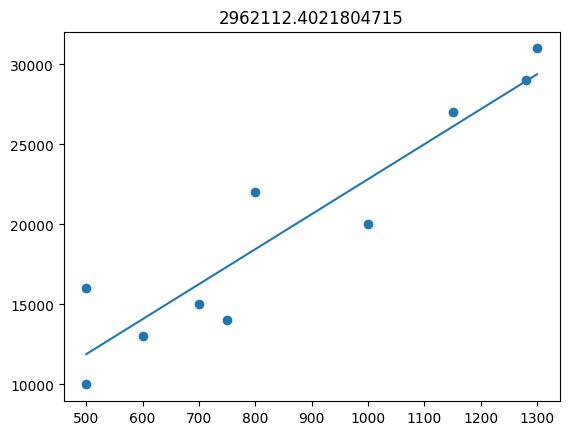

In [41]:
plt.scatter(x,y)
plt.plot(x,true_predict)
plt.title(cost)